# Exercises

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

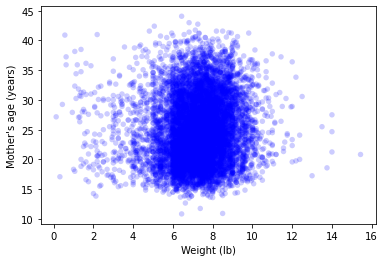

<Figure size 576x432 with 0 Axes>

In [2]:
# Scatter plot of birth weight versus mother's age
thinkplot.Scatter(live.totalwgt_lb, live.agepreg)
thinkplot.Show(xlabel=('Weight (lb)'), ylabel=('Mother\'s age (years)'))

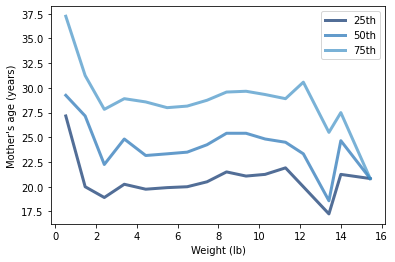

In [3]:
# Plot of percentiles of birth weight versus mother's age

# put data in 1 lb birth weight bins
bins = np.arange(0, 16, 1)
indices = np.digitize(live.totalwgt_lb, bins)
groups = live.groupby(indices)

# calculate mean weight and CDF of mother's age
weights = [group.totalwgt_lb.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]

# plot percentils of birth weight versus mother's age
for percent in [25,50,75]:
    age = [cdf.Percentile(percent) for cdf in cdfs]
    #label = '{}th'.format(percent)
    label= '%dth' % percent
    thinkplot.Plot(weights, age, label=label)
    thinkplot.Config(xlabel=('Weight (lb)'), ylabel=('Mother\'s age (years)'))

In [4]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

print('There is a weak positive correlation between birth weight and mother\'s age')
print('Pearson\'s: {:.4f}'.format(Corr(live.totalwgt_lb, live.agepreg)))
print('Spearman\'s: {:.4f}'.format(SpearmanCorr(live.totalwgt_lb, live.agepreg)))


There is a weak positive correlation between birth weight and mother's age
Pearson's: 0.0688
Spearman's: 0.0946
